## Efemeridska astronomija - Vežbe 2 i 3

**1. U kom sazvežđu se nalazio Uran u trenutku njegovog otkrića 13. marta 1781. godine? Koje su bile njegove ekvatorske koordinate i magnituda?**

Ključ za rešavanje ovog zadatka je funkcija *constellation*, koja za dato nebesko telo vraća ime sazvežđa u kom se ono nalazi. 

PyEphem ovo omogućuje tako što koordinate prosleđenog tela upoređuje sa vrednostima iz tabele lokacija sazvežđa koju je odredila Međunarodna Astronomska Unija, a koja se može naći na [ovom linku](https://github.com/brandon-rhodes/pyephem/blob/master/libastro/constel.c).

In [1]:
import ephem

uranus = ephem.Uranus()
uranus.compute("1781/3/13")

print(f"Kada je otkriven, Uran se nalazio u sazvežđu {ephem.constellation(uranus)[1]}\n")
print(f"""Njegove koordinate u tom trenutku su bile: 
        \tRektascenzija: {uranus.ra}
        \tDeklinacija: {uranus.dec}\n""")
print(f"Njegova magnituda je iznosila {uranus.mag}\n")

Kada je otkriven, Uran se nalazio u sazvežđu Taurus

Njegove koordinate u tom trenutku su bile: 
        	Rektascenzija: 5:35:45.28
        	Deklinacija: 23:32:54.1

Njegova magnituda je iznosila 5.6



**2. Odrediti na kom rastojanju od Jupitera se nalazio neotkriveni Neptun kada ih je Galileo skupa posmatrao 28. decembra 1612. godine.**

Ovaj zadatak rešavamo funkcijom *separation*, koja nam vraća ugaono rastojanje između dva nebeska tela koja joj prosledimo.

In [2]:
jupiter = ephem.Jupiter("1612/12/28")
neptune = ephem.Neptune("1612/12/28")

rastojanje = ephem.separation(jupiter, neptune)

print(f"Ugaono rastojanje između Jupitera i Neptuna je tada iznosilo {rastojanje}\n")

Ugaono rastojanje između Jupitera i Neptuna je tada iznosilo 0:14:24.6



**3. Odrediti koji put pređe Mars u toku jednog dana krećući se po perihelu, a potom i po afelu. Utvrditi blizu koje od ovih tačaka se kreće brže.
[Napomena: koristiti heliocentrične koordinate] (Za ovo je neophodno naći datume kada se poslednji put našao u ovim tačkama)**

Za ovaj zadatak koristimo i biblioteku *datetime* koja nam omogućava lakše baratanje datumima. Definišemo i dve korisničke funkcije:
- *get_last_apo_peri(body)*, koja za dato telo redom vraća datume kada se poslednji put našao u afelu i perihelu, tako što pamti datume kada je njegova udaljenost od Sunca bila najmanja tj najveća.
- *daily_mars_separation(date)*, koja za prosleđeni datum računa ugaono rastojanje položaja Marsa tada i sutradan.

In [3]:
import datetime

def get_last_apo_peri(body):
    body.compute("2022")
    
    last_perihelion = ""
    min_distance = mars.sun_distance

    last_aphelion = ""
    max_distance = mars.sun_distance

    now = datetime.datetime.now()
    for i in range(687): # mars' orbital period
        offset = datetime.timedelta(days=i)
        mars.compute(now-offset)

        if mars.sun_distance < min_distance:
            min_distance = mars.sun_distance
            last_perihelion = now - offset

        if mars.sun_distance > max_distance:
            max_distance = mars.sun_distance
            last_aphelion = now - offset
            
    return last_aphelion, last_perihelion
    

def mars_daily_separation(date):
    one_day = ephem.Mars(date)
    next_day = ephem.Mars(date + datetime.timedelta(days=1))

    return ephem.separation(one_day, next_day)
    
    
    
mars = ephem.Mars()

last_aphelion, last_perihelion = get_last_apo_peri(mars)

print("Rastojanje koje Mars dnevno pređe u perihelu: ")
print(mars_daily_separation(last_perihelion))

print("Rastojanje koje Mars dnevno pređe u afelu: ")
print(mars_daily_separation(last_aphelion))

print("\nDakle, brže se kreće u perihelu.\n")

Rastojanje koje Mars dnevno pređe u perihelu: 
0:43:11.3
Rastojanje koje Mars dnevno pređe u afelu: 
0:37:23.0

Dakle, brže se kreće u perihelu.



**4. Odrediti deklinaciju Marsa na današnji datum i dati rezultat u različitim formatima: dd:mm:ss (string) i radijanima (float).**

Biblioteka PyEphem uglove čuva u formatu koji nam pruža lak pristup i vrednosti ugla u stepenima i u radijanima. Kada je štampamo kao string, vrednost će biti stepenima, lučnim minutima i lučnim sekundama. Kada je štampamo kao float, vrednost će biti prikazana u radijanima.

In [4]:
mars = ephem.Mars()
mars.compute()

print("Deklinacija Marsa danas:")
print(f"\tU stepenima: {str(mars.dec)}")
print(f"\tU radijanima: {float(mars.dec)}\n")

Deklinacija Marsa danas:
	U stepenima: 24:45:53.6
	U radijanima: 0.4322289039047705



**5. Koristeći prethodno urađen zadatak, odrediti rastojanje Marsa u afelu u a.j., a zatim odrediti koju površinu prebriše u toku jednog dana (pps. pravougli trougao). Isto to odraditi i za perihel i pokazati da važi 2. Keplerov zakon.**

Za ovaj zadatak ćemo koristiti funkciju *get_last_apo_peri* od pre par zadataka. Ideja je da definišemo dva objekta, *mars* i *mars1*, koji čuva podatke za Mars jedan dan kasnije.

Funkcija *separation* će podrazumevano računati geocentričnu separaciju dva tela, i zato moramo eksplicitno da joj prosledimo heliocentrične koordinate Marsa (*mars.hlon* i *mars.hlat*).

Kako bismo dobili površinu koju Mars prebriše u toku jednog dana, posmatraćemo trougao čija su temena *mars*, *mars1* i Sunce, i aproksimiraćemo ga ravanskim trouglom. Najmanja stranica, koja povezuje *mars* i *mars1* je aproksimirana njihovim ugaonim rastojanjem. Za drugu katetu uzimamo rastojanje između jednog od Marseva i Sunca. Klasičnom formulom za površinu trougla, P=a\*ha/2, dolazimo do rešenja.

In [5]:
mars = ephem.Mars()
mars1 = ephem.Mars()

last_aphelion, last_perihelion = get_last_apo_peri(mars)

mars.compute(last_aphelion)
mars1.compute(last_aphelion + datetime.timedelta(days=1))
print("Površina koju Mars za dan prebriše u afelu:")
print(mars.sun_distance*mars.sun_distance*ephem.separation((mars.hlon, mars.hlat), (mars1.hlon, mars1.hlat))/2)

mars.compute(last_perihelion)
mars1.compute(last_perihelion + datetime.timedelta(days=1))
print("Površina koju Mars za dan prebriše u perihelu:")
print(mars.sun_distance*mars.sun_distance*ephem.separation((mars.hlon, mars.hlat), (mars1.hlon, mars1.hlat))/2)

Površina koju Mars za dan prebriše u afelu:
0.010571848589942309
Površina koju Mars za dan prebriše u perihelu:
0.010571031240891145


**6. Odrediti i odštampati UTC i lokalno vreme za Beograd na današnji dan.**

PyEphem sadrži funkciju *now* koja vraća trenutno UTC vreme. Takođe postoji i funkcija *localtime(date)*, koja će prosleđeni datum konvertovati u vremensku zonu na koju je podešen računar na kom se program pokreće. 

Informacije poput trenutnog vremena i vremenske zone PyEphem dobija od biblioteke *time* koja je sastavni deo programskog jezika Python, a ta biblioteka od računara podatke dobija pomoću sopstvenih biblioteka pisanih u jeziku C, koje u ovu svrhu koriste sistemske pozive, pa informacije zahtevaju direktno od operativnog sistema korisnika.

In [6]:
bg = ephem.Observer()

print(f"UTC: {ephem.now()}")
bg.lon = 20.457273
bg.lat = 44.787197
print(f"BGD: {ephem.localtime(bg.date)}")

UTC: 2022/12/23 10:15:16
BGD: 2022-12-23 11:15:16


**7. Odrediti današnji datum u broju dana čiji je početak perenja počeo 31. decembra 1899. godine u podne. Potom koristeći se tim rezultatom ponovo odštampati naredni dan.**

Ključ za rešavanje ovog zadatka je u načinu na koji PyEphem skladišti datume, tj u prepoznavanju da su svi datumi u ovoj biblioteci predstavljeni kao broj dana od 31. decembra 1899. godine.

PyEphem ima i ugrađen jednostavan sistem za baratanje datumima kroz funkciju *Date*. Ona nam omogućava da od brojevne vrednosti napravimo odgovarajući datum.

In [7]:
print("PyEphem datume predstavlja kao broj dana od 31.12.1899. godine u podne")
print("Taj broj dobijamo iz funkcije ephem.now()")

print(float(ephem.now()))
print(str(ephem.now()))

print(float(ephem.now()+1))
print(ephem.Date(ephem.now()+1))

PyEphem datume predstavlja kao broj dana od 31.12.1899. godine u podne
Taj broj dobijamo iz funkcije ephem.now()
44916.92773148148
2022/12/23 10:15:56
44917.92773148148
2022/12/24 10:15:56


**8. Definisati današnji datum pomoću float, string i tuple tipa podataka.**

Ovo su tri vrste ispisa koje podržava PyEphem. 

In [8]:
print(float(ephem.now()))
print(str(ephem.now()))
print(ephem.now().tuple())

44916.92833333333
2022/12/23 10:16:48
(2022, 12, 23, 10, 16, 48.0)


**9. Definisati posmatrača u Beogradu na datum i vreme početka ovonedeljnih vežbi, a potom odrediti položaje Sunca i Meseca u horizontskom koordinatnom sistemu za tog posmatrača**

In [9]:
bg = ephem.Observer()
bg.lon = "20.457273"
bg.lat = "44.787197"
bg.date = (2022, 10, 27, 8, 15, 0) #UTC = CEST - 2 (letnje računanje)

sun = ephem.Sun(bg)
print(f"Sunce:\n Az: {sun.az}\n H: {sun.alt}\n")

moon = ephem.Moon(bg)
print(f"Mesec:\n Az: {moon.az}\n H: {moon.alt}\n")

Sunce:
 Az: 145:18:17.7
 H: 25:38:05.6

Mesec:
 Az: 128:53:34.4
 H: 5:49:48.4



**10. Uraditi isto kao i u prethodnom zadatku (Begorad), samo za datum i vreme: 25. oktobar 2022. u 12:25 kada se dogodilo pomračenje Sunca. Na osnovu prividne veličine objekata, odrediti kom tipu ovo pomračenje pripada: delimičnom, prstenastom ili potpunom.**

Na osnovu prethodnog zadatka možemo lako da dobijemo podatke o lokacijama centara Sunca i Meseca na nebu u trenutku pomračenja. Ipak, kako ova nebeska tela imaju nezanemarljivu površinu na nebu, moramo ih uzeti u obzir. Tu nam pomaže atribut *size*, koji nam govori koliko lučnih sekundi iznosi ugaoni poluprečnik ovih tela na nebu. 

Možemo da plotujemo krugove odgovarajućih poluprečnika koji predstavljaju Sunce i Mesec na nebu, i lako utvrdimo da je u pitanju delimično pomračenje.

Sunce:
 Az: 197:10:44.5
 H: 31:28:18.0

1929.989501953125
Mesec:
 Az: 3.432562828063965
 H: 31:36:41.9

1924.995849609375


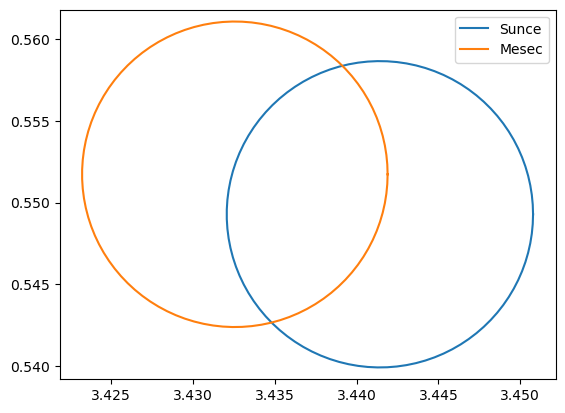

In [10]:
import matplotlib.pyplot as plt
import numpy as np

bg.date = (2022, 10, 25, 11, 22, 0) #UTC = CEST - 2 (letnje računanje)
sun = ephem.Sun(bg)
print(f"Sunce:\n Az: {sun.az}\n H: {sun.alt}\n")
print(sun.size)

moon = ephem.Moon(bg)
print(f"Mesec:\n Az: {float(moon.az)}\n H: {moon.alt}\n")
print(moon.size)

theta = np.linspace(0, 2*np.pi, 100)
r = sun.size/3600*np.pi/180
x = sun.az + r*np.cos(theta)
y = sun.alt + r*np.sin(theta)
plt.plot(x, y, label="Sunce")

r = moon.size/3600*np.pi/180
x = moon.az + r*np.cos(theta)
y = moon.alt + r*np.sin(theta)
plt.plot(x, y, label="Mesec")
plt.axis("equal")
plt.legend()
plt.show()

**11. Odrediti promenu prividne uglovne brzine Sunca tokom zalaska. Da li račun uzima u obzir prelamanje svetlosti u atmosferi? Potom promeniti vrednosti pritiska definisanog posmatrača na vrednosti 0. Da li sada uzima u obzir prelamanje svetlosti?**

Za ovaj zadatak ćemo proveravati promenu ugaonog rastojanja položaja Sunca nakon svakog minuta, nekoliko minuta nakon što se centar Sunčevog diska nađe na horizontu. 

Nakon prve iteracije, vidimo da se brzina zalaska smanjuje od horizonta. Kako znamo da se Sunce uvek kreće istom brzinom, zaključujemo da je u pitanju iluzija nastala usled uticaja refrakcije. Postavljanjem pritiska posmatrača na nulu eliminišemo ovaj uticaj, i vidimo da je brzina zalaska postala konstantna.

In [11]:
sun = ephem.Sun()
bg = ephem.Observer()
bg.lat = '44.787197'
bg.lon = '20.457273'

def show(date):
    bg.date = date
    sun.compute(bg)
    bg.date = bg.next_setting(sun, use_center=True) - ephem.minute
    sun.compute(bg)

    for i in range(6):
        old_az, old_alt = sun.az, sun.alt
        bg.date += ephem.minute
        sun.compute(bg)
        sep = ephem.separation((old_az, old_alt), (sun.az, sun.alt))
        print(f"{sep} ugaonih stepeni po minutu na visini od {sun.alt} stepeni")
    
    print()
    return
    
show("2022/11/3")
bg.pressure = 0
show("2022/11/3")

0:13:22.2 ugaonih stepeni po minutu na visini od 0:00:00.5 stepeni
0:13:17.9 ugaonih stepeni po minutu na visini od -0:08:08.1 stepeni
0:13:13.6 ugaonih stepeni po minutu na visini od -0:16:10.2 stepeni
0:13:09.0 ugaonih stepeni po minutu na visini od -0:24:05.6 stepeni
0:13:04.3 ugaonih stepeni po minutu na visini od -0:31:54.0 stepeni
0:12:59.6 ugaonih stepeni po minutu na visini od -0:39:35.4 stepeni

0:14:28.5 ugaonih stepeni po minutu na visini od 0:00:00.5 stepeni
0:14:28.6 ugaonih stepeni po minutu na visini od -0:09:54.1 stepeni
0:14:28.6 ugaonih stepeni po minutu na visini od -0:19:49.4 stepeni
0:14:28.6 ugaonih stepeni po minutu na visini od -0:29:45.4 stepeni
0:14:28.5 ugaonih stepeni po minutu na visini od -0:39:42.1 stepeni
0:14:28.6 ugaonih stepeni po minutu na visini od -0:49:39.5 stepeni



**12. Odrediti koje od planeta su vidljive za definisanog posmatrača iz Beograda? Odštampati njihove horizontske koordinate i magnitude.**

Za ovaj zadatak je dovoljno da proveravamo da li je visina planete za posmatrača u Beogradu iznad nule. Takođe, da se kod za proveru i štampanje ne bi ponavljao osam puta, odvojićemo ga u zasebnu funkciju.

In [12]:
bg = ephem.Observer()
bg.lon = "20.457273"
bg.lat = "44.787197"

def print_if_visible(body):
    body.compute(bg)
    
    if body.alt < 0:
        return
    
    print(body.name)
    print(f"Az: {body.az}")
    print(f"H: {body.alt}")
    print(f"M: {body.mag}\n")


print("Planete vidljive iz Beograda sada:\n")
print_if_visible(ephem.Mercury())
print_if_visible(ephem.Venus())
print_if_visible(ephem.Mars())
print_if_visible(ephem.Jupiter())
print_if_visible(ephem.Saturn())
print_if_visible(ephem.Uranus())
print_if_visible(ephem.Neptune())

Planete vidljive iz Beograda sada:

Mercury
Az: 154:42:23.2
H: 18:07:47.4
M: -0.24

Venus
Az: 159:44:38.7
H: 19:04:33.8
M: -3.78

Saturn
Az: 124:35:45.6
H: 10:38:47.2
M: 0.82

Neptune
Az: 95:15:19.9
H: 0:10:45.1
M: 7.9



**13. Definisati posmatrača u Beogradu i u odnosu na tog posmatrača pozvati zvezdu Polaris. potom odrediti deklinaciju:**
- a) na današnji dan za epohu 2000;
- b) na današnji dan za epohu 1000;
- c) na prvi dan 1000. godine za epohu 2000;
- c) na prvi dan 1000. godine za epohu 1000.

**Koji je razlog različitih vrednosti ovih deklinacija?**

Metodi *compute* se može proslediti i informacija o željenoj epohi. Kada ovako računamo koordinate zvezde, ne možemo se osloniti na ustaljeni atribut za deklinaciju *dec*, već moramo koristiti atribut *a_dec*, koji predstavlja astrometrijsku deklinaciju za određenu epohu.

In [13]:
polaris = ephem.star("Polaris")

polaris.compute(epoch="2000")
print(polaris.a_dec)

polaris.compute(epoch="1000")
print(polaris.a_dec)

polaris.compute("1000", epoch="2000")
print(polaris.a_dec)

polaris.compute("1000", epoch="1000")
print(polaris.a_dec)

89:15:50.5
83:47:35.8
89:16:02.5
83:47:25.5
